In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

In [2]:

df = pd.read_csv('car_data.csv')


In [3]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
df.shape

(1000, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [6]:
df.isnull().any()

User ID         False
Gender          False
Age             False
AnnualSalary    False
Purchased       False
dtype: bool

In [7]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [8]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [9]:
df.Purchased.value_counts()

Purchased
0    598
1    402
Name: count, dtype: int64

In [10]:
df.AnnualSalary.value_counts()

AnnualSalary
81500     18
73500     17
76500     14
80500     12
62500     12
          ..
94500      1
139000     1
104500     1
117500     1
101000     1
Name: count, Length: 247, dtype: int64

<Axes: ylabel='AnnualSalary'>

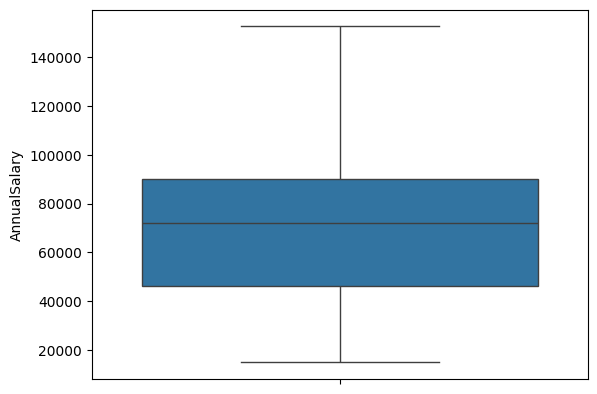

In [11]:

sns.boxplot(df.AnnualSalary)

<Axes: ylabel='Purchased'>

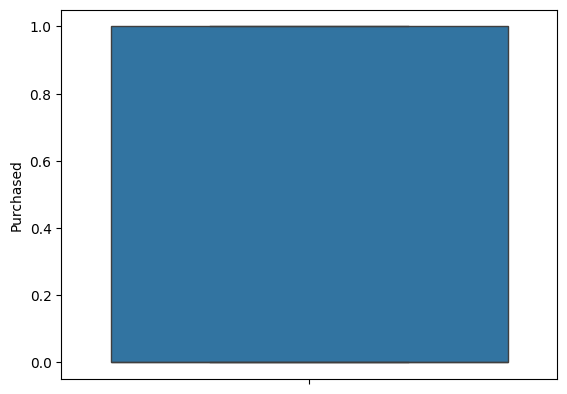

In [12]:
sns.boxplot(df.Purchased)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
df.	Gender = le.fit_transform(df.	Gender)

In [16]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0


<Axes: >

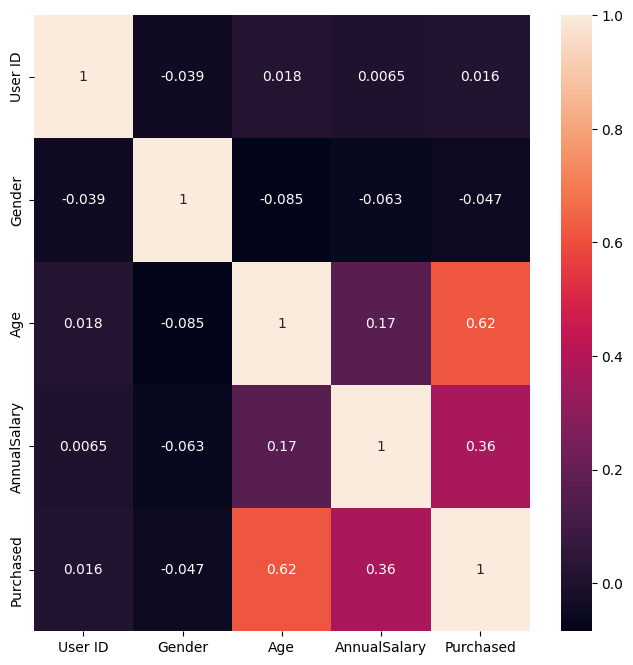

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot =True)

In [18]:
y = df['Purchased']
y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64

In [19]:
X =df.drop(columns =['Purchased','User ID',''],axis =1)


X.head()

KeyError: "[''] not found in axis"

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [ ]:
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,Gender,Age,AnnualSalary
0,1.0,0.377778,0.036364
1,1.0,0.488889,0.207273
2,1.0,0.688889,0.429091
3,1.0,0.488889,0.672727
4,1.0,0.155556,0.465455


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

In [ ]:
X_train.shape

(700, 3)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()

In [ ]:
x_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

Purchased
0    412
1    288
Name: count, dtype: int64

In [ ]:
y_train_smote.value_counts()

Purchased
1    412
0    412
Name: count, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier(criterion='entropy')

In [ ]:
model2.fit(x_train_smote,y_train_smote)

RandomForestClassifier(criterion='entropy')

In [ ]:
model2.fit(x_train_smote,y_train_smote)

RandomForestClassifier(criterion='entropy')

In [ ]:
r_y_predict = model2.predict(X_test)
r_y_predict_train = model2.predict(x_train_smote)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = model2, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


c:\Users\bhava\OneDrive\Desktop\car_flask\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
444 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\bhava\OneDrive\Desktop\car_flask\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\bhava\OneDrive\Desktop\car_flask\env\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\bhava\OneDrive\Desktop\car_flask\env\Lib\site-packages\sklearn\base.py", line 638, in _validate_params


GridSearchCV(cv=3, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 72}

In [ ]:
print (f'Train Accuracy - : {rf_Grid.score(x_train_smote,y_train_smote):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.925
Test Accuracy - : 0.887


In [ ]:
model2.predict([[1,40,43500]])

c:\Users\bhava\OneDrive\Desktop\car_flask\env\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [ ]:
import pickle


In [ ]:
pickle.dump(model2,open('car_purchase.pkl','wb'))